# Algerian Forest Fire -  Classification

# About this notebook  :   
   
     
In this notebook we would like to perform classification analysis for a given dataset. 
The EDA for this dataset can be found in :   
For classification analysis, Logistic Regression, KNN, SVC, Decision Tree, 
Random Forest and Naive bayes models were used.  
We take a look at the model evaluation metrics - Confusion matrix, accuracy, recall, precision, 
f1-score and log loss. We also take a look at the ROC curve and ROC-AUC Score for each model. Looking 
at the values we finally decide which model to use for prediction.    


During this analysis many online resources were very helpful. A list of these articles/blogs are listed at the 
end as references. 
    


In [1]:
#basic imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline
pd.pandas.set_option('display.max_rows', None)

from matplotlib import *
import sys
from pylab import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
# imports from sklearn classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
# standardization

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()

In [4]:
#  import from sklearn - metrices
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, log_loss

In [6]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [7]:
pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire




1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

We have data from two different regions : Bejaia Region and Sidi-Bel Abbes Region


In [8]:
# import data : 

df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header = 1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [9]:
df2 = df.copy()

df2.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [10]:
# we need to include region in dataframe as the data is from two different regions. 
# Bejaia Region and Sidi-Bel Abbes Region
# finding out the index :
d2_index = df[df['day']=='Sidi-Bel Abbes Region Dataset'].index.values
d2_index

df2.loc[:122,'Region'] = 1
df2.loc[122:,'Region'] = 2
#df2[['Region']] = df[['Region']].astype(int)
     
df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


## Observation 
1. Total number of rows : 246
2. Except for 'day', 245 non null objects. ie. 1 nan value object. For 'classes'
we have 2 nan objects.
3. Though the dataframe looks numerical but the type is object. Need to change this to 
integer type or float type as per requirement.
4. We need to check whether the nan values corresponds to a single row or different row. If that corresponds to a single row, may be we can drop that. If not may be we 
can replace the nan value with median value of that particular column.
5. The 'classes' column has 'fire' and 'not fire'. This we have to change it to '1' and '0' respectively. 
6. We need to find out the unique values so that we can differentiate categorical and 
numerical data. 

In [12]:
df2.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [13]:
df2.shape

(246, 15)

In [14]:
df2.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [15]:
featlist = [feature for feature in df2.columns]
print(type(featlist))
featlist

<class 'list'>


['day',
 'month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes  ',
 'Region']

In [16]:
# let us find out no of unique data for each and every feature

for feature in featlist :
    print(f'Feature {feature} has {len(df2[feature].unique())} number of unique values.')

Feature day has 33 number of unique values.
Feature month has 6 number of unique values.
Feature year has 3 number of unique values.
Feature Temperature has 21 number of unique values.
Feature  RH has 64 number of unique values.
Feature  Ws has 20 number of unique values.
Feature Rain  has 41 number of unique values.
Feature FFMC has 175 number of unique values.
Feature DMC has 168 number of unique values.
Feature DC has 200 number of unique values.
Feature ISI has 108 number of unique values.
Feature BUI has 176 number of unique values.
Feature FWI has 129 number of unique values.
Feature Classes   has 10 number of unique values.
Feature Region has 2 number of unique values.


## Observation :
1. day, month, year, temp, rain, rel humity, wind speed can be treated as categorical feature
2. the rest of them can be treated as continous feature.
3. day, month, year can be assigned to integer type. 
4. rest of them can be assigned to floating type. 

In [17]:
# finding out the location of text values : 
for feature in featlist :
    print(feature, df2[df2[feature] == feature].index.values)

day [123]
month [123]
year [123]
Temperature [123]
 RH [123]
 Ws [123]
Rain  [123]
FFMC [123]
DMC [123]
DC [123]
ISI [123]
BUI [123]
FWI [123]
Classes   [123]
Region []


## Observation : 
This row, i.e row 123 contains only the feature name. Hence, can be dropped. 

In [18]:
# finding out the location of null values : 
for feature in featlist :
    print(feature, df2[df2[feature].isnull()].index.values)

day []
month [122]
year [122]
Temperature [122]
 RH [122]
 Ws [122]
Rain  [122]
FFMC [122]
DMC [122]
DC [122]
ISI [122]
BUI [122]
FWI [122]
Classes   [122 167]
Region []


In [19]:
df2.loc[122]

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
 RH                                      NaN
 Ws                                      NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Region                                   2.0
Name: 122, dtype: object

## Observation :
We can also drop row 122. The values in it of no interest

In [20]:
# dropping row 123 and 124 : 

df2.drop([122,123],inplace=True)

In [21]:
m_index = df2[df2['DC']=='14.6 9'].index.values # fixing a particular row, where the values are misplaced
m_index[0]

167

In [22]:
df2['DC'].loc[m_index[0]]

'14.6 9'

In [23]:
df2.loc[m_index[0]]

day                 14
month               07
year              2012
Temperature         37
 RH                 37
 Ws                 18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Region             2.0
Name: 167, dtype: object

In [24]:
# tweaking row 168 manually to fix the discrepencies.

df2['DC'].loc[m_index[0]] = '14.6'
df2['ISI'].loc[m_index[0]] = '9'
df2['BUI'].loc[m_index[0]] = '12.5'
df2['FWI'].loc[m_index[0]] = '10.4'
df2['Classes  '].loc[m_index[0]] = 'fire   '
df2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1.0
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1.0
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1.0
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1.0
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1.0


In [25]:
#https://www.datacamp.com/blog/classification-machine-learning# let us assign the features to data type

df2['day'] = df2['day'].astype(int)
df2['year'] = df2['year'].astype(int)
df2['month'] = df2['month'].astype(int)

df2['Temperature'] = df2['Temperature'].astype(float)
df2[' RH'] = df2[' RH'].astype(float)
df2[' Ws'] = df2[' Ws'].astype(float)
df2['Rain '] = df2['Rain '].astype(float)
df2['FFMC'] = df2['FFMC'].astype(float)
df2['DMC'] = df2['DMC'].astype(float)
df2['DC'] = df2['DC'].astype(float)
df2['ISI'] = df2['ISI'].astype(float)
df2['BUI'] = df2['BUI'].astype(float)
df2['FWI'] = df2['FWI'].astype(float)

df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1.0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1.0


In [26]:
df2.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [27]:
df2['Classes  '].loc[84]

'fire   '

In [28]:
df2['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

## Observation :
The string 'fire' and 'not fire' has many varieties. We need to make them all uniform:

In [29]:
df2['Classes1'] = df2['Classes  '].apply(lambda x : x.replace(" ", ""))
df2['Classes1'].unique()

array(['notfire', 'fire'], dtype=object)

In [30]:
# now we can use label encoding : 
df2['Classes1'] = df2['Classes1'].map({'notfire' : '0', 'fire' : '1'})

In [31]:
#df2.info()
df2['Classes1'] = df2['Classes1'].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    float64
 4    RH          244 non-null    float64
 5    Ws          244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
 15  Classes1     244 non-null    int64  
dtypes: float64(11), int64(4), object(1)
memory usage: 40.5+ KB


In [32]:
df2.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
Classes1       0
dtype: int64

## Comments :
Till now we have done data preprocessing: 
1. made the data set in a proper way : rows and columns
2. Dropped row 123, 124. 
3. Fixed the values of cloumns manually for row 168

## Observation : 
Most of the fire incident occurs in the month of august

In [33]:
data = df2.copy()

data.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes1
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.179301,0.517224,0.350234,3.909990e-16,0.201784
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732,-2.023760e-16,0.022333
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,2.734961e-01,0.518119
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-4.064239e-01,-0.435023
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-1.768290e-01,-0.066529
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-4.108006e-02,-0.379449
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,2.246798e-01,0.770114
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,1.910937e-01,0.584188
DC,5.279285e-01,1.276719e-01,NaN,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,-8.148947e-02,0.507122


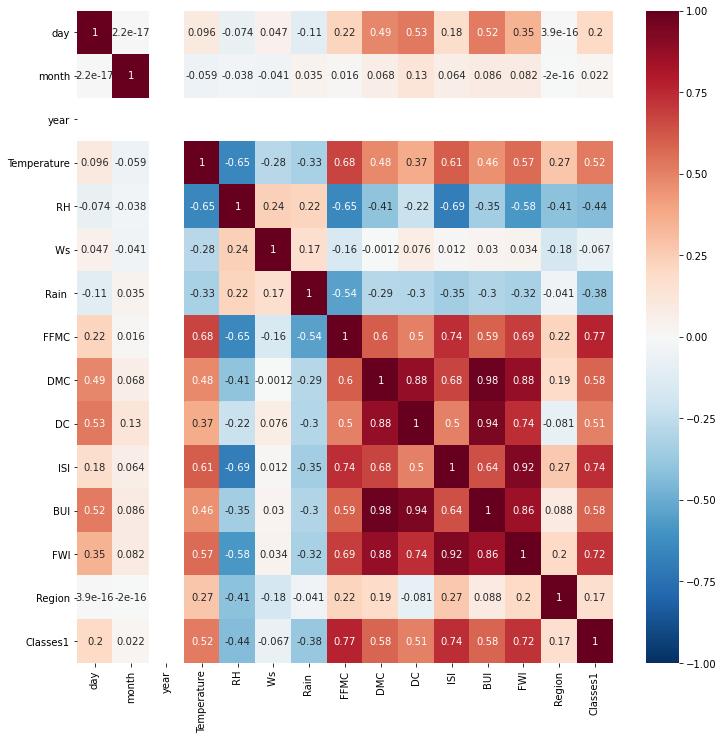

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

## Observation : 
1. The features FFMC, DMC, DC, ISI, BUI and FWI are highly correlated.
2. Only temperature is moderately correlated with these features. 
3. Wind speed is not at all correlated with FFMC, DMC, DC, ISI, BUI and FWI. 
4. Relative humidity and rain are negatively correlated with FFMC, DMC, DC, ISI, BUI and FWI. 



# Classification : 
So, for classification problem we will like to predict 'Classes1' as output features. The input features are : 
'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'.

In [35]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region', 'Classes1'],
      dtype='object')

In [36]:
# input features : 

dfml = data[['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 
            'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes1']].copy()



X = dfml.iloc[:, :-1]
y = dfml.iloc[:, -1]


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [38]:
## scaling part for linear, logistic and knn should go here. 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [39]:
cllogistic = LogisticRegression()
clknn = KNeighborsClassifier()
clsvc = SVC(probability = True) #https://github.com/scikit-learn/scikit-learn/issues/13662
cldt = DecisionTreeClassifier()
clrf = RandomForestClassifier()
clgnb = GaussianNB()

In [40]:
cllogistic.fit(X_train_scaled, y_train)
clknn.fit(X_train_scaled, y_train)
clsvc.fit(X_train_scaled, y_train)
cldt.fit(X_train, y_train)
clrf.fit(X_train, y_train)
clgnb.fit(X_train, y_train)

GaussianNB()

In [41]:
predict_logistic = cllogistic.predict(X_test_scaled)
predict_knn = clknn.predict(X_test_scaled)
predict_svc = clsvc.predict(X_test_scaled)
predict_dtr = cldt.predict(X_test)
predict_rf = clrf.predict(X_test)
predict_gnb = clgnb.predict(X_test)

In [42]:
# finding training accuracy : 

print('--------- Training Accuracy -----------')
print('Logistic Regression : ', accuracy_score(y_train, cllogistic.predict(X_train_scaled)))
print('KNN : ', accuracy_score(y_train, clknn.predict(X_train_scaled)))
print('SVC : ', accuracy_score(y_train, clsvc.predict(X_train_scaled)))
print('Decision Tree : ', accuracy_score(y_train, cldt.predict(X_train)))
print('Random Forest : ', accuracy_score(y_train, clrf.predict(X_train)))
print('Gaussian NB : ', accuracy_score(y_train, clgnb.predict(X_train)))


train_accuracy = [accuracy_score(y_train, cllogistic.predict(X_train_scaled)), 
                  accuracy_score(y_train, clknn.predict(X_train_scaled)), 
                  accuracy_score(y_train, clsvc.predict(X_train_scaled)), 
                  accuracy_score(y_train, cldt.predict(X_train)), 
                  accuracy_score(y_train, clrf.predict(X_train)), 
                  accuracy_score(y_train, clgnb.predict(X_train))]


train_logloss = [log_loss(y_train, cllogistic.predict(X_train_scaled)), 
                  log_loss(y_train, clknn.predict(X_train_scaled)), 
                  log_loss(y_train, clsvc.predict(X_train_scaled)), 
                  log_loss(y_train, cldt.predict(X_train)), 
                  log_loss(y_train, clrf.predict(X_train)), 
                  log_loss(y_train, clgnb.predict(X_train))]


--------- Training Accuracy -----------
Logistic Regression :  0.9294117647058824
KNN :  0.9411764705882353
SVC :  0.9588235294117647
Decision Tree :  1.0
Random Forest :  1.0
Gaussian NB :  0.9470588235294117


In [43]:
# function to get the metrics for various models. 

def get_metric(y_test, list_y_pred, modelnames): 
    """
    This function will take y_test, list of predictions and list of models and 
    will find the metric and return back the metric dataframe. 
    
    """    
    #lists to store the metrics : 
    aclist = list() # accuracy
    prelist = list() # precision
    relist = list() # recall
    f1list = list() # f1 score 
    loglist = list() # logloss
    indexlist = list()
    
    for i in range(0, len(modelnames)): 
        y_pred = list_y_pred[i]
        aclist.append(accuracy_score(y_test, y_pred))
        prelist.append(precision_score(y_test, y_pred, pos_label=1))
        relist.append(recall_score(y_test, y_pred, pos_label = 1))
        f1list.append(f1_score(y_test, y_pred, pos_label = 1))
        loglist.append(log_loss(y_test, y_pred))
        indexlist.append(modelnames[i])

    dfscores1 = pd.DataFrame({'Accuracy Score' : aclist, 'Recall Score' : relist, 
                              'Precision Score': prelist, 'F1 Score' : f1list, 'Log Loss' : loglist}, 
                               index = indexlist)    
        
    return dfscores1


In [44]:
modelnames = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest', 'Gaussian NB']
modelpredictions = [predict_logistic, predict_knn, predict_svc, predict_dtr, predict_rf, predict_gnb]



df_metric = get_metric(y_test, modelpredictions, modelnames)
df_metric.sort_values(by=['Accuracy Score'], ascending = False)

,Accuracy Score,Recall Score,Precision Score,F1 Score,Log Loss
Decision Tree,0.986486,0.978723,1.000000,0.989247,0.466740
Random Forest,0.972973,0.957447,1.000000,0.978261,0.933480
KNN,0.959459,1.000000,0.940000,0.969072,1.400253
Logistic Regression,0.945946,0.936170,0.977778,0.956522,1.866972
SVC,0.945946,0.936170,0.977778,0.956522,1.866972
Gaussian NB,0.945946,0.936170,0.977778,0.956522,1.866972


Observation : Looking at the above table, it can be inferred that all the models works well. The accuracy 
score for Random Forest is the highest. Comparing the accuracy scores for the training and test data and also for the log loss, it can be said that the models are not overfitting the data. 

Let us look at the confusion matrix.

In [45]:
for i in range(len(modelnames)): 
    print('--------------------------------------')
    print(modelnames[i])
    print(confusion_matrix(y_test, modelpredictions[i]))

--------------------------------------
Logistic Regression
[[26  1]
 [ 3 44]]
--------------------------------------
KNN
[[24  3]
 [ 0 47]]
--------------------------------------
SVC
[[26  1]
 [ 3 44]]
--------------------------------------
Decision Tree
[[27  0]
 [ 1 46]]
--------------------------------------
Random Forest
[[27  0]
 [ 2 45]]
--------------------------------------
Gaussian NB
[[26  1]
 [ 3 44]]


Observation :  The confusion matrix looks pretty clean. Mostly the predicted values are well predicted ones. The number of misidentifications are very small. The current data set is very small. This might be the reason behind this. 


We need to check the ROC and AUC before commenting anything regarding the model performances. 
    

# ROC-AUC : 

In [46]:
# finding probabilities for different models 

prob_logistic = cllogistic.predict_proba(X_test_scaled)[:, 1]
prob_knn = clknn.predict_proba(X_test_scaled)[:, 1]
prob_svc = clsvc.predict_proba(X_test_scaled)[:, 1] #https://github.com/scikit-learn/scikit-learn/issues/13662
prob_dtr = cldt.predict_proba(X_test)[:, 1]
prob_rf = clrf.predict_proba(X_test)[:, 1]
prob_gnb = clgnb.predict_proba(X_test)[:, 1]

In [47]:
list_prob_models  = [prob_logistic, prob_knn, prob_svc, prob_dtr, prob_rf, prob_gnb]    

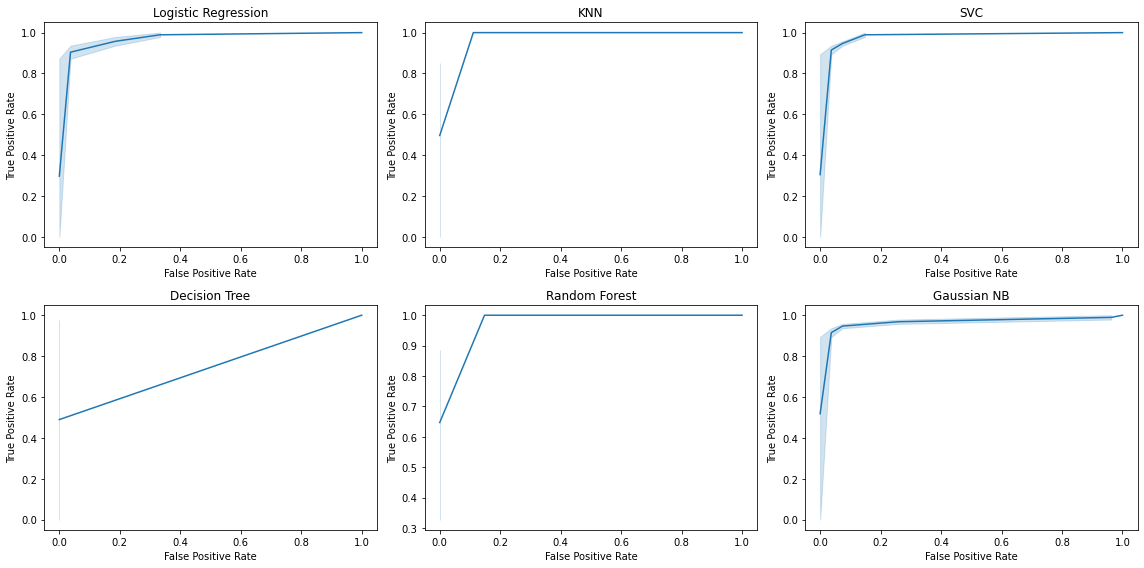

In [48]:
fig, axes = plt.subplots(2,3, figsize=(16,8), tight_layout = True)
si1 = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]]



for i in range(len(list_prob_models)) : 
    rf_fpr, rf_tpr, threshold = roc_curve(y_test, list_prob_models[i], pos_label=1)
    #print(rf_fpr)
    #print(rf_tpr)
    #print(threshold)
    j = si1[i][0]
    k = si1[i][1]
    sns.lineplot(rf_fpr, rf_tpr, ax = axes[j,k], legend=True)
    axes[j,k].set_title(modelnames[i])
    axes[j,k].set_xlabel('False Positive Rate')
    axes[j,k].set_ylabel('True Positive Rate')
    #axes[j,k].legend(mlist[i])

plt.show()


In [49]:
# auc calculation 

def get_auc(y_test, listprobpred) : 
    """
    This function takes y_test and list of probabilities as input and returns the roc-auc score.
    """
    auc_vals = list()

    for i in range(len(listprobpred)) : 
        auc_vals.append(roc_auc_score(y_test, listprobpred[i]))
        
        
    df_auc = pd.DataFrame(auc_vals, index = modelnames)
        
    return df_auc


auc_scores = get_auc(y_test, list_prob_models)
auc_scores

,0
Logistic Regression,0.982664
KNN,0.991726
SVC,0.991332
Decision Tree,0.989362
Random Forest,1.000000
Gaussian NB,0.970843


# Comments : 


Looking at the AUC values one can interprete that all of the models are working really well (AUC > 96%), but the best one is Random Forest. 

This is to be noted that, as the size given dataset is small and number of features are too many, we should use the simplest model, i.e. the Logistic Regression. 

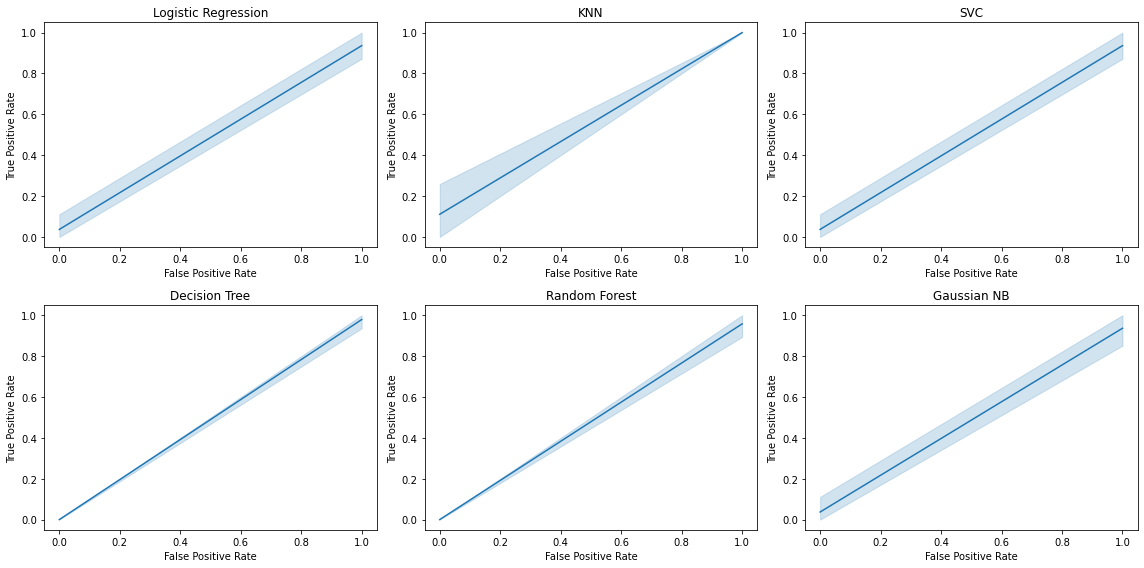

In [51]:
fig, axes = plt.subplots(2,3, figsize=(16,8), tight_layout = True)
si1 = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]]



for i in range(len(list_prob_models)) : 
    j = si1[i][0]
    k = si1[i][1]
    sns.lineplot(y_test, modelpredictions[i], ax = axes[j,k], legend=True)
    axes[j,k].set_title(modelnames[i])
    axes[j,k].set_xlabel('False Positive Rate')
    axes[j,k].set_ylabel('True Positive Rate')
    #axes[j,k].legend(mlist[i])

plt.show()

## References : 

1. https://github.com/scikit-learn/scikit-learn/issues/13662 

2. https://vitalflux.com/classification-problems-real-world-examples/  

3. https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/  

4. https://neptune.ai/blog/evaluation-metrics-binary-classification      

5. https://ryan-reilly.medium.com/gridsearch-pipelines-of-multiple-models-on-multiclass-classification-e9124b6ea2e3

6. https://donernesto.github.io/blog/optimizing-with-sklearns-gridsearchcv-and-pipeline/  

7. https://towardsdatascience.com/get-into-shape-14637fe1cd32

8. https://github.com/dataprofessor/code/blob/master/python/ROC_curve.ipynb

9. https://www.statology.org/plot-roc-curve-python/

10. https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

11. https://www.datacamp.com/blog/classification-machine-learning

12. https://towardsdatascience.com/understanding-the-roc-curve-and-auc-dd4f9a192ecb

13. https://www.geeksforgeeks.org/how-to-solve-overfitting-in-random-forest-in-python-sklearn/  

14. https://towardsdatascience.com/dont-overfit-ii-how-to-avoid-overfitting-in-your-machine-learning-and-deep-learning-models-2ff903f4b36a   

15. https://towardsdatascience.com/linear-regression-models-4a3d14b8d368

16. https://machinelearninghd.com/gridsearchcv-hyperparameter-tuning-sckit-learn-regression-classification/

17. https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv-for-regression

18. https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/

19. https://github.com/MoinDalvs/Neural_Networks_Forest_Fire_Classification/blob/main/Assignment_Neural_Networks_Forest_Fires.ipynb

20. https://towardsdatascience.com/intuition-behind-roc-auc-score-1456439d1f30
